In [2]:
#Jean Saavedra
# tarea stack de imagenes de cada grupo de imagens, por ejemplot un stack de bias, un stack de dark, ...
# Resultando archivo un master (masterbias, masterdark, masterflat_V,....)
import os
import glob
import numpy as np
from astropy.io import fits
import matplotlib.pylab as plt
from astropy.visualization import ImageNormalize
from astropy.visualization import simple_norm, MinMaxInterval, PercentileInterval, ZScaleInterval

%matplotlib inline
datapath = "C:/Users/Jean/Documents/Python/Práctica/M55_LCO/"
listaBias = []
listaDark = []
listaCienciaV = []
listaCienciaRP = []
listaCienciaB = []
listaFlatB = []
listaFlatRP = []
listaFlatV = []
listaCienciaV = []
todasImagenes = glob.glob(os.path.join(datapath, '*.fz'))
for imagen in todasImagenes:
    header = fits.getheader(imagen, ext=1)
    #print(header['OBSTYPE'], header['FILTER'])
    if header['OBSTYPE'] == 'BIAS':
        listaBias.append(imagen)
    elif header['OBSTYPE'] == 'DARK':
        listaDark.append(imagen)
    elif header['OBSTYPE'] == 'EXPOSE':
        if header['FILTER'] == 'B':
            listaCienciaB.append(imagen)
        elif header['FILTER'] == 'rp':
            listaCienciaRP.append(imagen)
        elif header['FILTER'] == 'V':
            listaCienciaV.append(imagen)
    elif header['OBSTYPE'] == 'SKYFLAT':
        if header['FILTER'] == 'B':
            listaFlatB.append(imagen)
        elif header['FILTER'] == 'rp':
            listaFlatRP.append(imagen)
        elif header['FILTER'] == 'V':
            listaFlatV.append(imagen)

In [3]:
# combinar los 17 bias en una imagen, para combinar usar el promedio y median, los mismo con los darks, los flats (NO se combina la ciencia!!!)
# Resultando archivo un master (masterbias, masterdark, masterflat_V,....)

datosimagen1 = fits.getdata(listaBias[0], ext=1) 

In [4]:
matrizSumaBias = np.empty_like(datosimagen1)
for imagenBias in listaBias:
    dataBias = fits.getdata(imagenBias, ext=1)
    matrizSumaBias = np.add(matrizSumaBias,dataBias)
matrizSumaBias = np.array(matrizSumaBias/len(listaBias), dtype = np.int16)

In [5]:
matrizSumaDark = np.empty_like(datosimagen1)
for imagenDark in listaDark:
    dataDark = fits.getdata(imagenDark, ext=1)
    matrizSumaDark = np.add(matrizSumaDark,dataDark)
matrizSumaDark = np.array(matrizSumaDark/len(listaDark), dtype = np.int16)

In [6]:
matrizSumaFlatB = np.empty_like(datosimagen1)
for imagenFlatB in listaFlatB:
    dataFlatB = fits.getdata(imagenFlatB, ext=1)
    matrizSumaFlatB = np.add(matrizSumaFlatB,dataFlatB)
matrizSumaFlatB = np.array(matrizSumaFlatB/len(listaFlatB), dtype = np.int16)

In [7]:
matrizSumaFlatRP = np.empty_like(datosimagen1)
for imagenFlatRP in listaFlatRP:
    dataFlatRP = fits.getdata(imagenFlatRP, ext=1)
    matrizSumaFlatRP = np.add(matrizSumaFlatRP,dataFlatRP)
matrizSumaFlatRP = np.array(matrizSumaFlatRP/len(listaFlatRP), dtype = np.int16)

In [8]:
matrizSumaFlatV = np.empty_like(datosimagen1)
for imagenFlatV in listaFlatV:
    dataFlatV = fits.getdata(imagenFlatV, ext=1)
    matrizSumaFlatV = np.add(matrizSumaFlatV,dataFlatV)
matrizSumaFlatV = np.array(matrizSumaFlatV/len(listaFlatV), dtype = np.int16)

In [9]:
# Operacion: (Ciencia_V - masterbias)/masterflat_V

np.seterr(divide='ignore', invalid='ignore')
dataFlatExpose = fits.getdata(listaCienciaRP[0], ext=1)
matrizRestaCBias = np.array((dataFlatExpose - matrizSumaBias)/matrizSumaFlatRP)

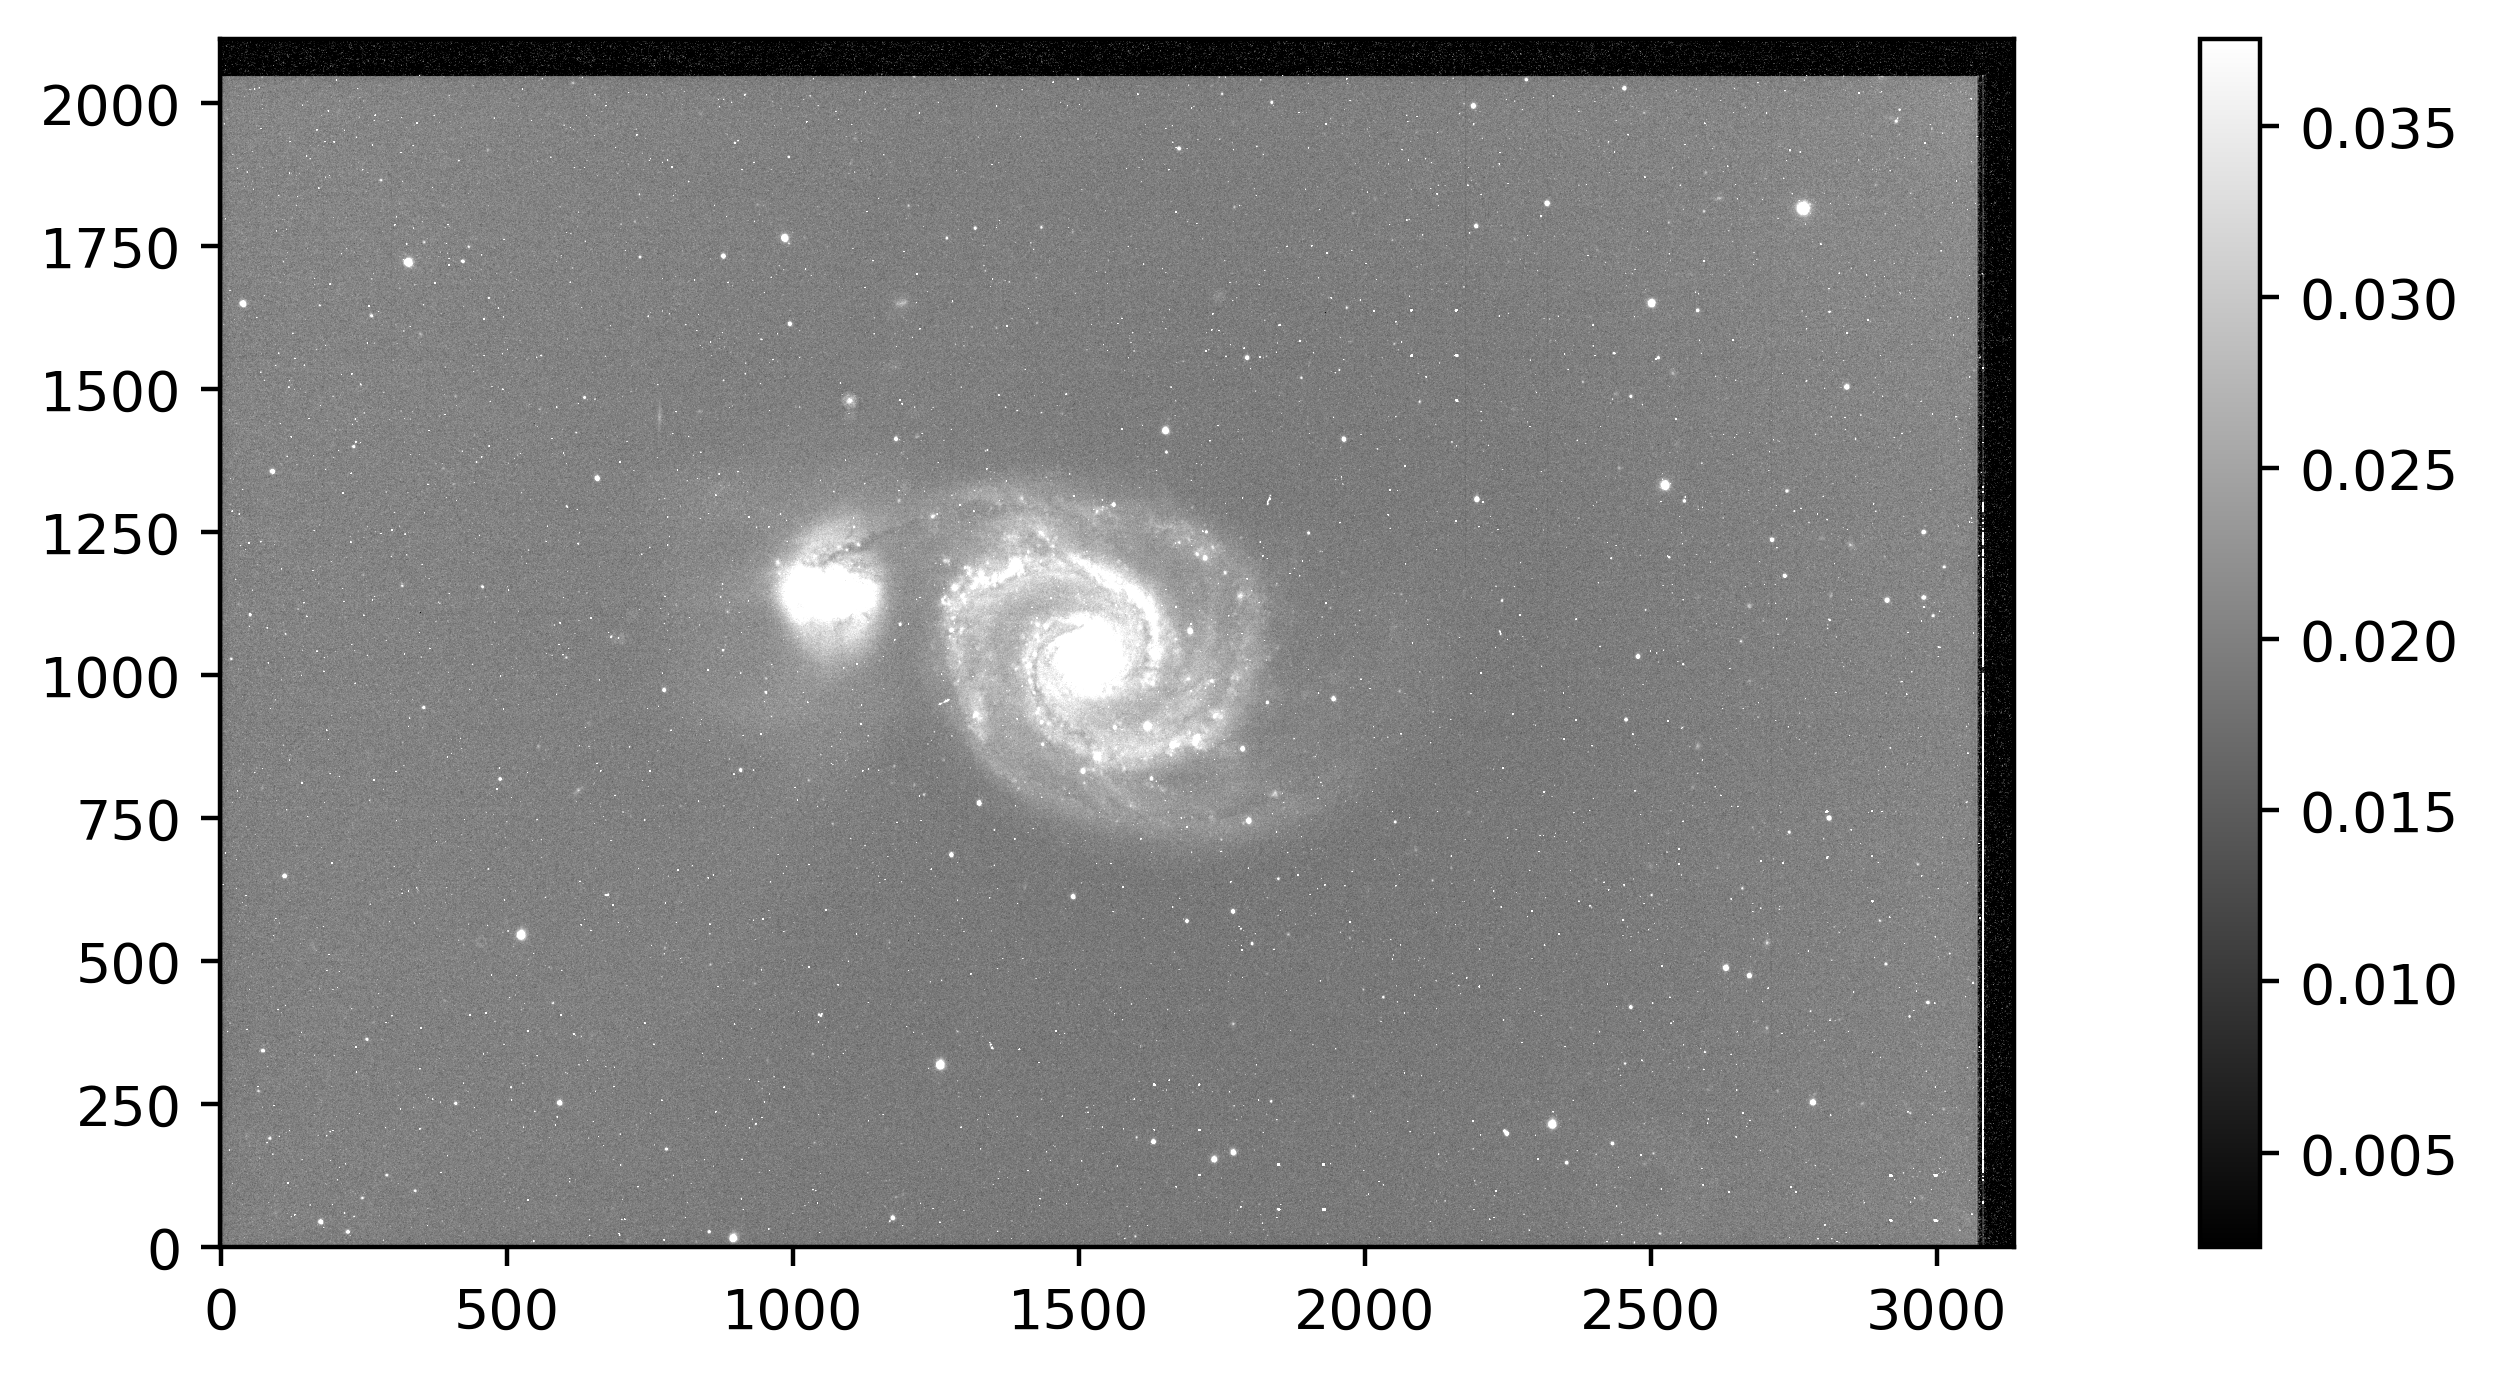

In [10]:
interval = ZScaleInterval()
norm = ImageNormalize(matrizRestaCBias, interval=ZScaleInterval())

fig = plt.figure(figsize=(12,4), dpi= 400)
ax = fig.add_subplot(1, 1, 1)
plot = ax.imshow(matrizRestaCBias, cmap='gray', origin='lower', norm=norm,)
fig.colorbar(plot)

array([[1017, 1020, 1025, ..., 1033, 1032, 1035],
       [1021, 1026, 1029, ..., 1037, 1033, 1037],
       [1020, 1024, 1024, ..., 1037, 1035, 1037],
       ...,
       [1018, 1017, 1025, ..., 1035, 1034, 1031],
       [1014, 1018, 1024, ..., 1031, 1029, 1030],
       [1021, 1025, 1024, ..., 1031, 1032, 1031]], dtype=int16)

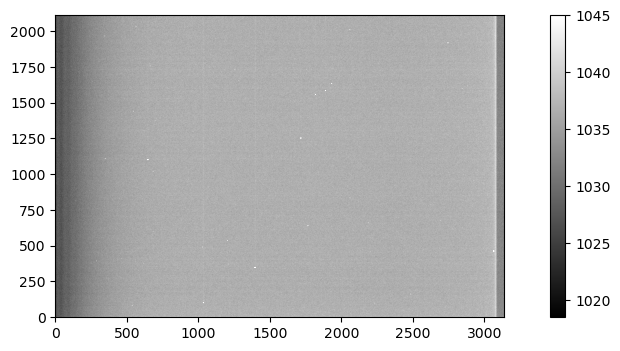

In [13]:
interval = ZScaleInterval()
norm = ImageNormalize(matrizSumaBias, interval=ZScaleInterval())

fig = plt.figure(figsize=(12,4), dpi= 100)
ax = fig.add_subplot(1, 1, 1)
plot = ax.imshow(matrizSumaBias, cmap='gray', origin='lower', norm=norm,)
fig.colorbar(plot)